In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from matplotlib.patches import Ellipse
import cmasher as cms

In [2]:
list_of_files = ['epoch1.fits', 'epoch2.fits', 'epoch3.fits', 'epoch4.fits', 'epoch5.fits',\
                 'epoch6.fits', 'epoch9.fits','epoch12.fits']
#list_of_files = ['epoch1.fits']

### check the date and frequency on all the images

In [3]:
image_cube = []
bmaj_array = []
bmin_array = []
bpa_array = []

for file in list_of_files:
    
    hdu = fits.open(file)
    obs_date = hdu[0].header['DATE-OBS']
    obs_freq = hdu[0].header['CRVAL3']
    
    bmaj = hdu[0].header['BMAJ']
    bmin = hdu[0].header['BMIN']
    bpa = hdu[0].header['BPA']  
    
    print('epoch {} freq {} file {}'.format(obs_date, obs_freq, file))
    
    data = hdu[0].data[0,0,:,:]
    rotated_data = rotate(data, -90 + 48, order=5, reshape=False)
    
    image_cube.append(rotated_data)
    bmaj_array.append(bmaj)
    bmin_array.append(bmin)
    bpa_array.append(bpa)
    
    
    
image_cube = np.array(image_cube)
stack = np.average(image_cube, axis=0)

epoch 2013-01-27 freq 7783875000.0 file epoch1.fits
epoch 2013-02-11 freq 7783875000.0 file epoch2.fits
epoch 2013-03-06 freq 7783875000.0 file epoch3.fits
epoch 2013-04-06 freq 7783875000.0 file epoch4.fits
epoch 2013-04-23 freq 7783875000.0 file epoch5.fits
epoch 2013-05-11 freq 7783875000.0 file epoch6.fits
epoch 2013-07-06 freq 7783875000.0 file epoch9.fits
epoch 2013-08-23 freq 7783875000.0 file epoch12.fits


In [4]:
def getNoise(data):
    """
    get the noise in the image
    """
    tmp = np.copy(data)
    tmp[np.abs(tmp) > 3*np.std(tmp)] = 0
    tmp[np.abs(tmp) > 3*np.std(tmp)] = 0
    return np.std(tmp)


<ipython-input-11-921f6b401eff>:22: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("cmr.cosmic"))
  cmap.set_bad(color='white')
<ipython-input-11-921f6b401eff>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, stack, cmap=cmap, vmin=-25*noise, vmax=35*noise)
<ipython-input-11-921f6b401eff>:129: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  elpse = Ellipse(xy=[70, -23], width = bmin_mean, height = bmaj_mean ,\


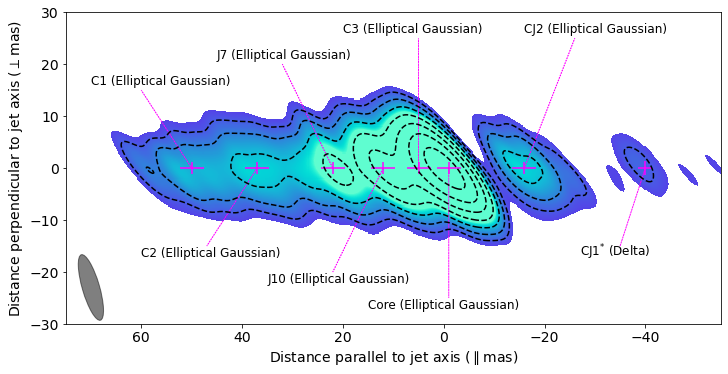

In [11]:
#cmap = plt.get_cmap('cmr.emergency_s')
cmap = plt.get_cmap('cmr.cosmic')
x = np.linspace(-(0-512)*0.2, -(1024-512)*0.2, 1024)
y = np.linspace((0-512)*0.2, (1024-512)*0.2, 1024)
X, Y  = np.meshgrid(x,y)
cont_fact = np.sqrt(2)
noise = getNoise(stack)
hfont = {'fontname':'Helvetica', 'size':12, 'color': 'black'}
hfont2 = {'fontname':'Helvetica', 'size':14}

#plt.figure(figsize=(10,5))
fig, ax =  plt.subplots(figsize=(10,5))

plt.subplots_adjust(left=0.08,
                    bottom=0.115,
                    right=0.99,
                    top=0.98,
                    wspace=0,
                    hspace=0)

stack = np.ma.masked_where(stack <= 3*noise, stack)
cmap.set_bad(color='white')

#plt.pcolormesh(X, Y, stack, cmap=cmap)
plt.pcolormesh(X, Y, stack, cmap=cmap, vmin=-25*noise, vmax=35*noise)

#cbar = plt.colorbar(location='top')


plt.contour(X,Y,stack, colors='black', levels=[noise*cont_fact**3, noise*cont_fact**5,\
                                               noise*cont_fact**7, noise*cont_fact**9, noise*cont_fact**11, noise*cont_fact**13,\
                                              noise*cont_fact**15, noise*cont_fact**17], linestyles='dashed')

plt.xlim(75, -55)
plt.ylim(-30, 30)

color2 = 'magenta'
## plot components
#plt.scatter(50 , 0, marker='+', color=color2, s=1700, alpha=1)
#plt.scatter(50 , 0, marker='o', edgecolor=color2, s=1700, alpha=1, facecolor='none')

plt.scatter(50, 0, marker='_', color=color2, s=600)
plt.scatter(50, 0, marker='|', color=color2, s=130)
#ellipse = Ellipse(xy=[50,0], width=5*2.2, height=2*2.2, angle=0,  edgecolor=color2, facecolor='None')
#ax.add_artist(ellipse)


#plt.scatter(37 , 0, marker='+', color=color2, s=1400, alpha=1)
#plt.scatter(37 , 0, marker='o', edgecolor=color2, s=1400, alpha=1, facecolor='none')

plt.scatter(37, 0, marker='_', color=color2, s=600)
plt.scatter(37, 0, marker='|', color=color2, s=130)
#ellipse = Ellipse(xy=[37,0], width=5*2.2, height=2*2.2, angle=0,  edgecolor=color2, facecolor='None')
#ax.add_artist(ellipse)



plt.scatter(22, 0, marker='_', color=color2, s=600)
plt.scatter(22, 0, marker='|', color=color2, s=130)
#ellipse = Ellipse(xy=[22,0], width=5*1.5, height=2*1.5, angle=0,  edgecolor=color2, facecolor='None')
#ax.add_artist(ellipse)


plt.scatter(12, 0, marker='_', color=color2, s=600)
plt.scatter(12, 0, marker='|', color=color2, s=130)
#ellipse = Ellipse(xy=[12,0], width=5*1.5, height=2*1.5, angle=0,  edgecolor=color2, facecolor='None')
#ax.add_artist(ellipse)



plt.scatter(5, 0, marker='_', color=color2, s=600)
plt.scatter(5, 0, marker='|', color=color2, s=130)
#ellipse = Ellipse(xy=[5,0], width=5, height=2, angle=0,  edgecolor=color2, facecolor='None')
#ax.add_artist(ellipse)


plt.scatter(-1, 0, marker='_', color=color2, s=600)
plt.scatter(-1, 0, marker='|', color=color2, s=130)
#ellipse = Ellipse(xy=[-1,0], width=5, height=2, angle=0,  edgecolor=color2, facecolor='None')
#ax.add_artist(ellipse)

plt.scatter(-16, 0, marker='_', color=color2, s=600)
plt.scatter(-16, 0, marker='|', color=color2, s=130)
#ellipse = Ellipse(xy=[-16,0], width=5*2, height=2*2, angle=0,  edgecolor=color2, facecolor='None')
#ax.add_artist(ellipse)



plt.scatter(-40 , 0, marker='+', color=color2, s=200, alpha=1)


## annotate
plt.arrow(50, 0, dx=10, dy=15, color=color2, alpha=1, linestyle='dotted')
plt.text(70,16,'C1 (Elliptical Gaussian)', **hfont)

plt.arrow(37, 0, dx=10, dy=-15, color=color2, alpha=1, linestyle='dotted')
plt.text(60,-17,'C2 (Elliptical Gaussian)', **hfont)

plt.arrow(22, 0, dx=10, dy=20, color=color2, alpha=1, linestyle='dotted')
plt.text(45,21,'J7 (Elliptical Gaussian)', **hfont)

plt.arrow(12, 0, dx=10, dy=-20, color=color2, alpha=1, linestyle='dotted')
plt.text(35,-22,'J10 (Elliptical Gaussian)', **hfont)

plt.arrow(5, 0, dx=0, dy=25, color=color2, alpha=1, linestyle='dotted')
plt.text(20,26,r'C3 (Elliptical Gaussian)', **hfont)

plt.arrow(-1, 0, dx=0, dy=-25, color=color2, alpha=1, linestyle='dotted')
plt.text(15,-27,'Core (Elliptical Gaussian)', **hfont)

plt.arrow(-16, 0, dx=-10, dy=25, color=color2, alpha=1, linestyle='dotted')
plt.text(-16,26,'CJ2 (Elliptical Gaussian)', **hfont)


plt.arrow(-40, 0, dx=5, dy=-15, color=color2, alpha=1, linestyle='dotted')
plt.text(-27,-17,r'CJ1$^{*}$ (Delta)', **hfont)


plt.xlabel(r'Distance parallel to jet axis ($\parallel$mas)', **hfont2)
plt.ylabel(r'Distance perpendicular to jet axis ($\perp$mas)', **hfont2)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

## plot epoch 1 beam
bmaj_mean = np.mean(bmaj_array)*3600*1e3
bmin_mean = np.mean(bmin_array)*3600*1e3
bpa_mean = np.mean(bpa_array)*3600*1e3

elpse = Ellipse(xy=[70, -23], width = bmin_mean, height = bmaj_mean ,\
                angle = bpa_mean + 48, color='black', alpha=0.5, edgecolor='black', zorder=1) 

ax.add_artist(elpse)
    
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.savefig('diagram.png', dpi=300)